# Stroke Prediction

Our top priority in this health problem is to identify patients with a stroke


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [79]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [80]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [81]:
df=df.drop(columns=['id','ever_married', 'work_type','Residence_type'])

In [82]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


In [83]:
df.tail()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,85.28,26.2,Unknown,0


In [84]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [85]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [86]:
df.isna().sum()/len(df)*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [87]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [88]:
df.shape

(5110, 8)

In [89]:
df.size

40880

In [90]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


# Exploratory Data Analysis

In [92]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [93]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [94]:
ind = []

for i, val in enumerate(df['gender']):
    if val == 'Other':
        ind.append(i)
ind

[3116]

In [95]:
df.drop(index = ind, inplace = True)

df.to_csv("healthcare-dataset-stroke-data-1.csv", index = False)

df = pd.read_csv("healthcare-dataset-stroke-data-1.csv")


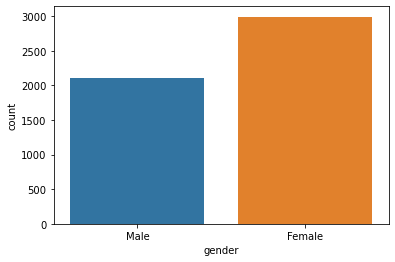

In [96]:
sns.countplot(x = 'gender', data = df)
plt.show()

sns.countplot(x = 'work_type', data = df)
plt.show()

In [97]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

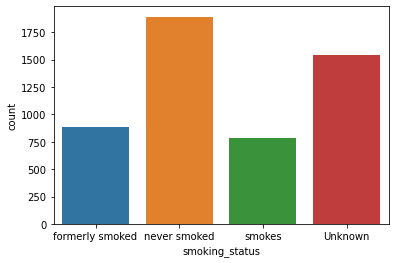

In [98]:
sns.countplot(x = 'smoking_status', data = df)
plt.show()

In [99]:
#df = pd.read_csv("healthcare-dataset-stroke-data-2.csv")

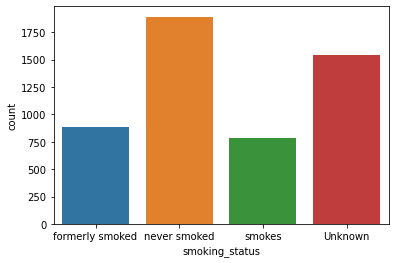

In [100]:
 sns.countplot(x = 'smoking_status', data = df)
plt.show()

# One-Hot-Encoding

In [101]:
smoking = pd.get_dummies(df['smoking_status'])
smoking

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5104,0,0,1,0
5105,0,0,1,0
5106,0,0,1,0
5107,0,1,0,0


In [102]:
df = df.join(smoking)

df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1,0,1,0,0
1,Female,61.0,0,0,202.21,28.893237,never smoked,1,0,0,1,0
2,Male,80.0,0,1,105.92,32.500000,never smoked,1,0,0,1,0
3,Female,49.0,0,0,171.23,34.400000,smokes,1,0,0,0,1
4,Female,79.0,1,0,174.12,24.000000,never smoked,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,83.75,28.893237,never smoked,0,0,0,1,0
5105,Female,81.0,0,0,125.20,40.000000,never smoked,0,0,0,1,0
5106,Female,35.0,0,0,82.99,30.600000,never smoked,0,0,0,1,0
5107,Male,51.0,0,0,166.29,25.600000,formerly smoked,0,0,1,0,0


In [103]:
gender = pd.get_dummies(df['gender'])
gender

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5104,1,0
5105,1,0
5106,1,0
5107,0,1


In [104]:
df = df.join(gender)

df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly smoked,never smoked,smokes,Female,Male
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1,0,1,0,0,0,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1,0,0,1,0,1,0
2,Male,80.0,0,1,105.92,32.500000,never smoked,1,0,0,1,0,0,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1,0,0,0,1,1,0
4,Female,79.0,1,0,174.12,24.000000,never smoked,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,83.75,28.893237,never smoked,0,0,0,1,0,1,0
5105,Female,81.0,0,0,125.20,40.000000,never smoked,0,0,0,1,0,1,0
5106,Female,35.0,0,0,82.99,30.600000,never smoked,0,0,0,1,0,1,0
5107,Male,51.0,0,0,166.29,25.600000,formerly smoked,0,0,1,0,0,0,1


In [105]:
#df.drop(["gender", "work_type"], axis="columns")

In [106]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly smoked,never smoked,smokes,Female,Male
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1,0,1,0,0,0,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1,0,0,1,0,1,0
2,Male,80.0,0,1,105.92,32.500000,never smoked,1,0,0,1,0,0,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1,0,0,0,1,1,0
4,Female,79.0,1,0,174.12,24.000000,never smoked,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,83.75,28.893237,never smoked,0,0,0,1,0,1,0
5105,Female,81.0,0,0,125.20,40.000000,never smoked,0,0,0,1,0,1,0
5106,Female,35.0,0,0,82.99,30.600000,never smoked,0,0,0,1,0,1,0
5107,Male,51.0,0,0,166.29,25.600000,formerly smoked,0,0,1,0,0,0,1


In [107]:
df=df.drop(columns=['gender','smoking_status'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

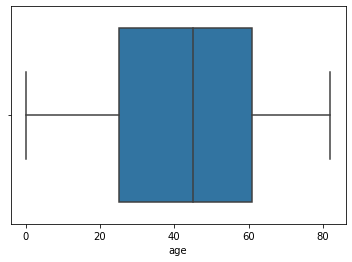

In [108]:
sns.boxplot(df['age'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

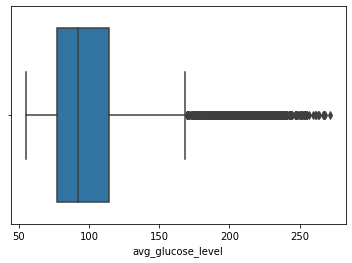

In [109]:
sns.boxplot(df['avg_glucose_level'])

In [110]:
grt =[]
low = []
gind=[]
Iind=[]


for i,x in enumerate(df.avg_glucose_level):
    if x > 140:
        grt.append(x)
        gind.append(i)
    if x<60:
        low.append(x)
        Iind.append(i)
        
ind = gind+Iind
print(len(ind))   

1040


In [111]:
df.drop(index = ind, inplace = True)

In [112]:
df.to_csv("healthcare-dataset-stroke-data1.csv", index = False)

In [113]:
df = pd.read_csv("healthcare-dataset-stroke-data1.csv")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

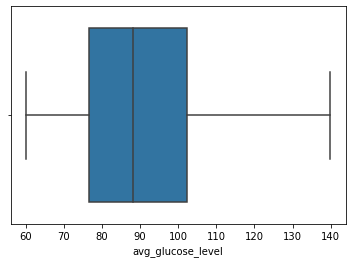

In [114]:
sns.boxplot(df['avg_glucose_level'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

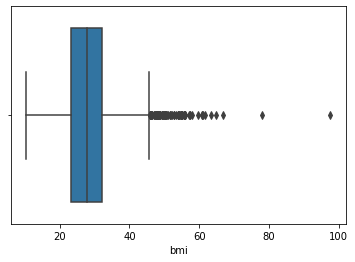

In [115]:
sns.boxplot(df['bmi'])

In [116]:
grt =[]
low = []
gind=[]
Iind=[]


for i,x in enumerate(df.bmi):
    if x > 45:
        grt.append(x)
        gind.append(i)
    if x<15:
        low.append(x)
        Iind.append(i)
        
ind = gind+Iind

len(grt)

98

In [117]:
df.drop(index = ind, inplace = True)

In [118]:
df.to_csv("healthcare-dataset-stroke-data2.csv", index = False)

In [119]:
df = pd.read_csv("healthcare-dataset-stroke-data2.csv")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

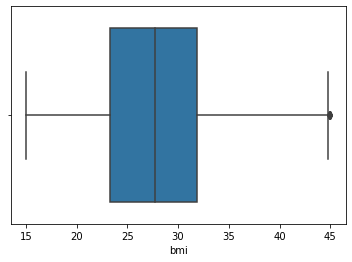

In [120]:
sns.boxplot(df['bmi'])

In [121]:
df.bmi.mean()

27.870373161840607

In [122]:
df.bmi.median()

27.7

In [123]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes,Female,Male
0,80.0,0,1,105.92,32.500000,1,0,0,1,0,0,1
1,74.0,1,1,70.09,27.400000,1,0,0,1,0,0,1
2,69.0,0,0,94.39,22.800000,1,0,0,1,0,1,0
3,59.0,0,0,76.15,28.893237,1,1,0,0,0,1,0
4,81.0,1,0,80.43,29.700000,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3927,13.0,0,0,103.08,18.600000,0,1,0,0,0,1,0
3928,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0
3929,81.0,0,0,125.20,40.000000,0,0,0,1,0,1,0
3930,35.0,0,0,82.99,30.600000,0,0,0,1,0,1,0


In [124]:
feature = ['age' ,'hypertension' , 'heart_disease','avg_glucose_level' ,'bmi' ,'Female','Male','never smoked','smokes']
X = df[feature]
y = df.stroke

In [125]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,never smoked,smokes
0,80.0,0,1,105.92,32.500000,0,1,1,0
1,74.0,1,1,70.09,27.400000,0,1,1,0
2,69.0,0,0,94.39,22.800000,1,0,1,0
3,59.0,0,0,76.15,28.893237,1,0,0,0
4,81.0,1,0,80.43,29.700000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
3927,13.0,0,0,103.08,18.600000,1,0,0,0
3928,80.0,1,0,83.75,28.893237,1,0,1,0
3929,81.0,0,0,125.20,40.000000,1,0,1,0
3930,35.0,0,0,82.99,30.600000,1,0,1,0


In [126]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3927    0
3928    0
3929    0
3930    0
3931    0
Name: stroke, Length: 3932, dtype: int64

# Standard Scaler

In [127]:
#from sklearn.preprocessing import StandardScaler

In [128]:
#scaler = StandardScaler()

In [129]:
#Xn = scaler.fit_transform(X)
#X = pd.DataFrame(Xn)

#X

# Train-Test Splitting

In [130]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [131]:
X_train , X_test ,y_train , y_test = train_test_split(X, y , test_size = 0.3,stratify=y)

# KNN


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
from sklearn.neighbors import KNeighborsClassifier  

In [134]:
knn = KNeighborsClassifier(n_neighbors=5 )  

In [135]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [136]:
y_pred=knn.predict(X_test)

In [137]:
from sklearn.metrics import classification_report

In [138]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98      1136\n           1       0.27      0.07      0.11        44\n\n    accuracy                           0.96      1180\n   macro avg       0.62      0.53      0.54      1180\nweighted avg       0.94      0.96      0.95      1180\n'

In [139]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [140]:
precision_score(y_test,y_pred,average='macro')

0.6188272805039272

In [141]:
recall_score(y_test,y_pred,average='macro')

0.5305697823303457

In [142]:
f1_score(y_test,y_pred,average='macro')

0.5439163873003352

In [143]:
f1_score(y_test,y_pred,average='micro')

0.9584745762711865

# Nave baise

In [144]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()

gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
cnb.fit(X_train, y_train)

ComplementNB()

In [145]:
# making predictions on the testing set
y_gnb = gnb.predict(X_test)
y_mnb = mnb.predict(X_test)
y_cnb = cnb.predict(X_test)

In [146]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb)*100)
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_mnb)*100)
print("Complement Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_cnb)*100)

Gaussian Naive Bayes model accuracy(in %): 89.40677966101694
Multinomial Naive Bayes model accuracy(in %): 78.64406779661017
Complement Naive Bayes model accuracy(in %): 67.37288135593221


In [147]:
precision_score(y_test,y_gnb,average='macro')

0.5502145812453422

In [148]:
precision_score(y_test,y_mnb,average='macro')

0.5360524891774892

In [149]:
recall_score(y_test,y_pred,average='macro')

0.5305697823303457

In [150]:
f1_score(y_test,y_gnb,average='macro')

0.5631842829262803

In [151]:
f1_score(y_test,y_mnb,average='macro')

0.5188349514563106

In [152]:
f1_score(y_test,y_cnb,average='macro')

0.4668935371255904

In [153]:
f1_score(y_test,y_pred,average='micro')

0.9584745762711865

# Decision tree

In [154]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [155]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [156]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9322033898305084


In [157]:
from sklearn.metrics import classification_report

In [158]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96      1136\n           1       0.09      0.09      0.09        44\n\n    accuracy                           0.93      1180\n   macro avg       0.53      0.53      0.53      1180\nweighted avg       0.93      0.93      0.93      1180\n'

In [159]:
precision_score(y_test,y_pred,average='macro')

0.5278489116517285

In [160]:
recall_score(y_test,y_pred,average='macro')

0.5278489116517285

In [161]:
f1_score(y_test,y_pred,average='macro')

0.5278489116517285

# Random forest

In [162]:
from sklearn.ensemble import RandomForestClassifier # Import  Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [163]:
# Create Decision Tree classifer object
rf = RandomForestClassifier(n_estimators=10)

# Train Decision Tree Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [164]:
precision_score(y_test,y_pred,average='macro')

0.48132427843803055

In [165]:
recall_score(y_test,y_pred,average='macro')

0.49911971830985913

In [166]:
f1_score(y_test,y_pred,average='macro')

0.49006050129645634

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb.score(X_test, y_test)

0.9610169491525423

In [168]:
f1_gb = f1_score(y_test, y_pred, average ='macro')

f1_gb

0.5300432900432901